In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir("C:/Users/Abhie/Desktop/Data Science (BI)/Pandas Python/Loan Prediction")

In [3]:
lp_test=pd.read_csv("test_lAUu6dG.csv")

In [4]:
lp_train=pd.read_csv("train_ctrUa4K.csv")

In [5]:
lp_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
lp_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
lp=lp_test.append(lp_train)

In [8]:
lp.shape

(981, 13)

In [9]:
lp_test.shape

(367, 12)

In [10]:
lp_train.shape

(614, 13)

In [11]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


# EDA

In [12]:
lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
lp.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,614
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [15]:
lp.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [16]:
lp.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000


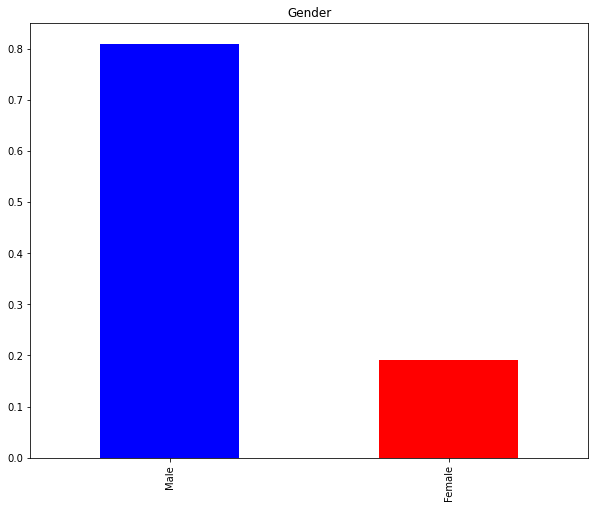

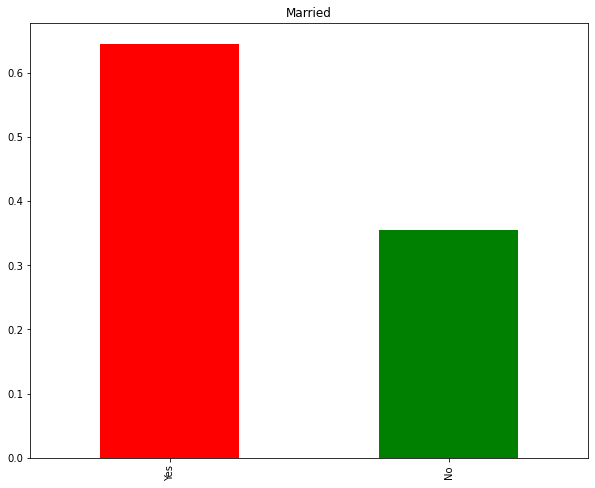

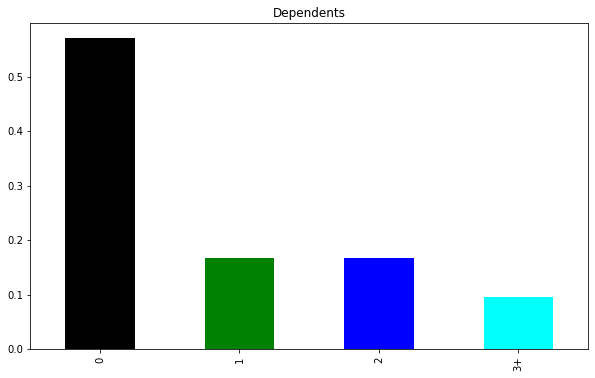

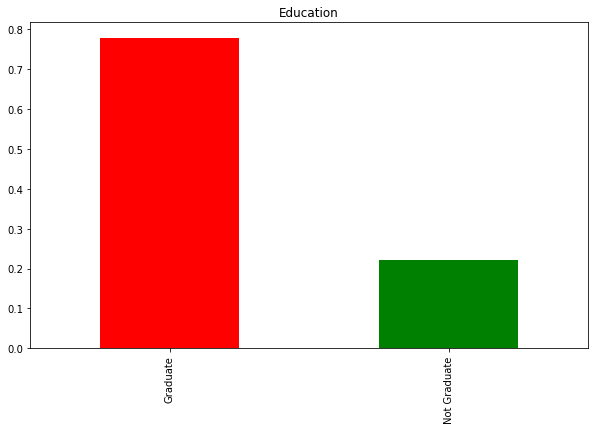

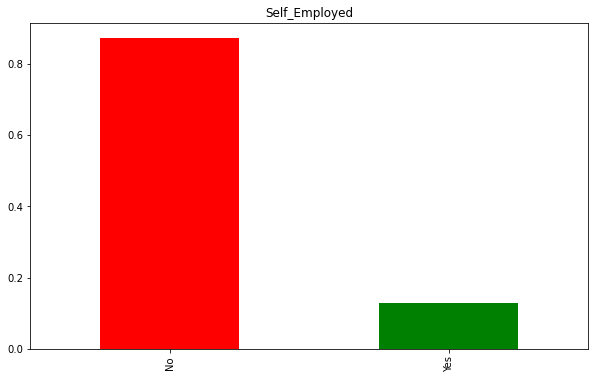

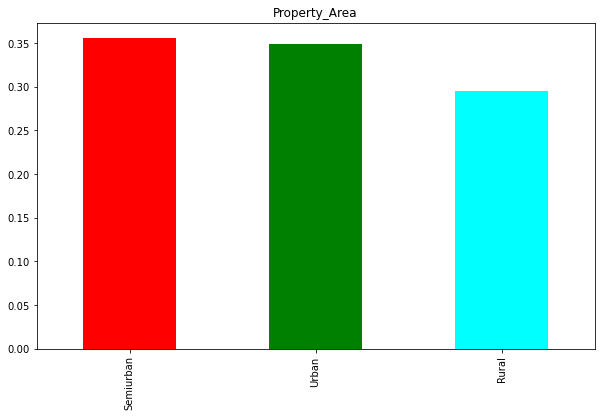

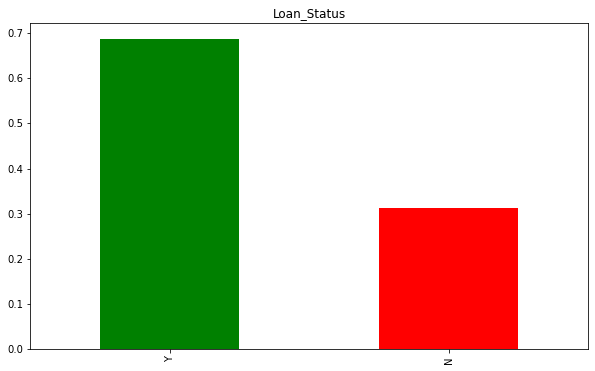

In [17]:
lp['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,8), title="Gender", color=['blue', 'red'])
plt.show()
lp['Married'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Married',color=['red', 'green'])
plt.show()
lp['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Dependents', color=['black', 'green', 'blue', 'cyan'])
plt.show()
lp["Education"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Education', color=['red', 'green'])
plt.show()
lp["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Self_Employed', color=['red', 'green'])
plt.show()                                          
lp["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Property_Area', color=['red', 'green', 'cyan'])
plt.show()                                          
lp["Loan_Status"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Loan_Status', color=['green', 'red'])
plt.show()                    

In [18]:
pd.crosstab(lp["Gender"],lp["Education"])

Education,Graduate,Not Graduate
Gender,,
Female,148,34
Male,596,179


In [19]:
pd.crosstab(lp["Gender"], lp["Property_Area"])

Property_Area,Rural,Semiurban,Urban
Gender,,,
Female,42,82,58
Male,241,256,278


In [21]:
pd.crosstab(lp["Gender"], lp["Credit_History"])

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,118,619


In [20]:
#Fill missing values in Gender Variable
lp["Gender"].fillna("Male", inplace=True)

In [20]:
lp["Gender"].isna().sum()

0

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

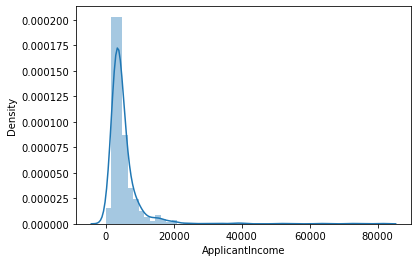

In [21]:
#ApplicantIncome
sns.distplot(lp["ApplicantIncome"])

<AxesSubplot:xlabel='ApplicantIncome'>

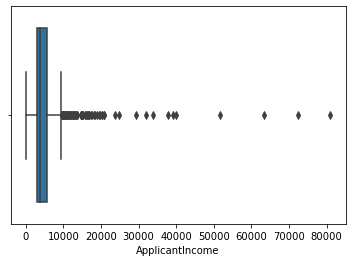

In [22]:
sns.boxplot(lp["ApplicantIncome"])

In [23]:
lp["ApplicantIncome"].isna().sum()

0

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

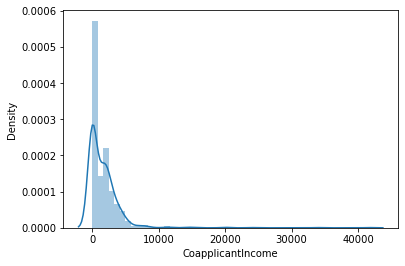

In [24]:
#CoapplicantIncome
sns.distplot(lp["CoapplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

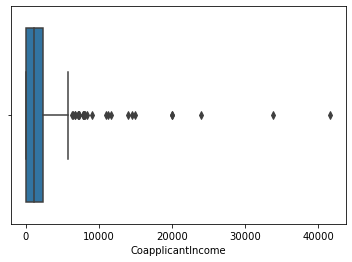

In [25]:
sns.boxplot(lp["CoapplicantIncome"])

In [26]:
lp["CoapplicantIncome"].isna().sum()

0

# Creating a new Variable "Total Income"

In [27]:
lp["TotalIncome"]=lp["ApplicantIncome"]+lp["CoapplicantIncome"]
lp["TotalIncome"]

0      5720.0
1      4576.0
2      6800.0
3      4886.0
4      3276.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 981, dtype: float64

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

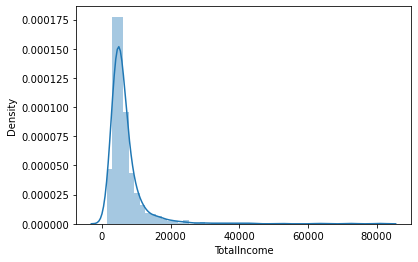

In [28]:
sns.distplot(lp["TotalIncome"])

In [29]:
lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN,5720.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN,4576.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN,6800.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN,4886.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN,3276.0


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

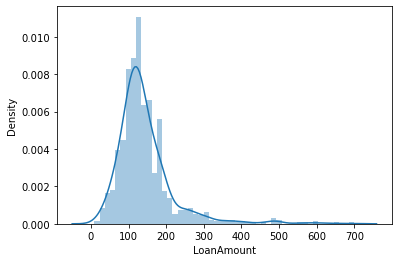

In [30]:
#LoanAmount
sns.distplot(lp["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount'>

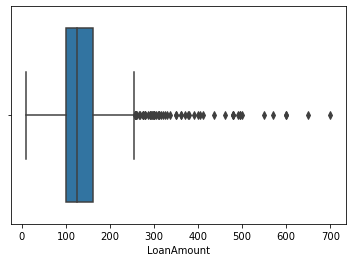

In [31]:
sns.boxplot(lp["LoanAmount"])

In [32]:
lp["LoanAmount"].isna().sum()

27

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

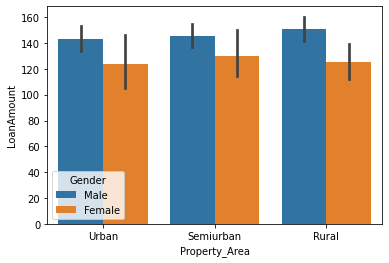

In [33]:
sns.barplot(x="Property_Area",y="LoanAmount", data= lp, hue="Gender")

In [34]:
lp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

In [35]:
lp["LoanAmount"].isna().sum()

27

# Creating a new DataFrame to predict Loan Amount Using Linear Regression

In [36]:
lp_LoanAmt=lp[["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"]]
lp_LoanAmt

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount
0,LP001015,5720,0.0,110.0
1,LP001022,3076,1500.0,126.0
2,LP001031,5000,1800.0,208.0
3,LP001035,2340,2546.0,100.0
4,LP001051,3276,0.0,78.0
...,...,...,...,...
609,LP002978,2900,0.0,71.0
610,LP002979,4106,0.0,40.0
611,LP002983,8072,240.0,253.0
612,LP002984,7583,0.0,187.0


# Test and Train Split

In [37]:
train_la=lp_LoanAmt[lp.LoanAmount.notnull()]
test_la=lp_LoanAmt[lp.LoanAmount.isnull()]

In [38]:
train_la.shape,test_la.shape

((954, 4), (27, 4))

In [39]:
Y_train=train_la.LoanAmount
X_train=train_la.drop("LoanAmount",axis=1)
X_test=test_la.drop(["LoanAmount"],axis=1)

# Using Linear Regression Algorithm to predict missing Loan Amount

In [40]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train.drop("Loan_ID",axis=1),Y_train)

LinearRegression()

In [41]:
y_predLA=LR.predict(X_test.drop("Loan_ID",axis=1))
y_predLA

array([145.57328935, 108.70074963, 193.39907312, 169.26776074,
       183.71883837, 136.77697977, 123.01263737, 129.70117491,
       109.7417696 , 144.07977395, 197.8371056 , 152.04007383,
       149.31618264, 132.52239008, 122.24183637, 252.76069269,
       106.65001858, 130.11226647, 105.31939156, 136.11476346,
       169.63563997, 116.05132368, 125.08263795, 141.97459136,
       142.91351851, 126.82857045, 135.90500286])

# Extracting indexes having Loan Amount as Null

In [42]:
lp.loc[lp.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
78,LP001415,Male,Yes,1,Graduate,No,3413,4053.0,NaN,360.0,1.0,Semiurban,NaN,7466.0
101,LP001542,Female,Yes,0,Graduate,No,2262,0.0,NaN,480.0,0.0,Semiurban,NaN,2262.0
188,LP002057,Male,Yes,0,Not Graduate,No,13083,0.0,NaN,360.0,1.0,Rural,NaN,13083.0
247,LP002360,Male,Yes,NaN,Graduate,No,10000,0.0,NaN,360.0,1.0,Urban,NaN,10000.0
289,LP002593,Male,Yes,1,Graduate,No,8333,4000.0,NaN,360.0,1.0,Urban,NaN,12333.0
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y,4342.0
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N,4945.0
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y,2395.0
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,6782.0


# Assigning the Predicted Loan Amount to the derived Indexes

In [43]:
lp.loc[lp.LoanAmount.isna(), 'LoanAmount'] = y_predLA

In [44]:
lp["LoanAmount"].isna().sum()

0

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

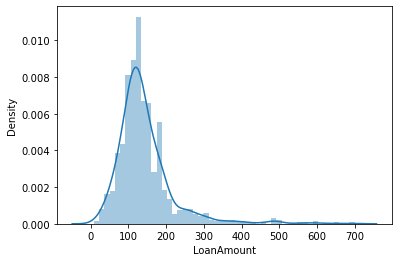

In [45]:
sns.distplot(lp["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount'>

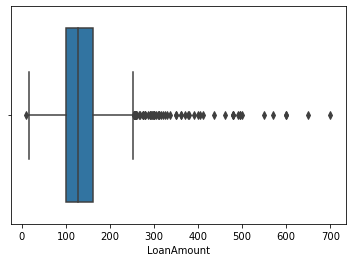

In [46]:
sns.boxplot(lp["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

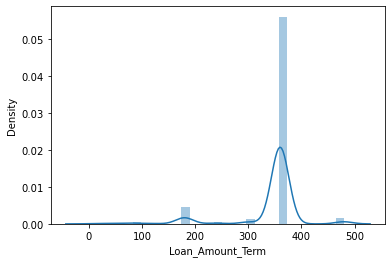

In [47]:
#Loan_Amount_Term
sns.distplot(lp["Loan_Amount_Term"])

In [48]:
lp["Loan_Amount_Term"].unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [49]:
lp["Loan_Amount_Term"].nunique()

12

In [50]:
lp[lp["Loan_Amount_Term"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
45,LP001232,Male,Yes,0,Graduate,No,4260,3900.0,185.0,NaN,NaN,Urban,NaN,8160.0
48,LP001268,Male,No,0,Graduate,No,6792,3338.0,187.0,NaN,1.0,Urban,NaN,10130.0
117,LP001611,Male,Yes,1,Graduate,No,1516,2900.0,80.0,NaN,0.0,Rural,NaN,4416.0
129,LP001695,Male,Yes,1,Not Graduate,No,3321,2088.0,70.0,NaN,1.0,Semiurban,NaN,5409.0
184,LP002045,Male,Yes,3+,Graduate,No,10166,750.0,150.0,NaN,1.0,Urban,NaN,10916.0
214,LP002183,Male,Yes,0,Not Graduate,No,3754,3719.0,118.0,NaN,1.0,Rural,NaN,7473.0
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,6100.0
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,3158.0
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,4695.0
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,3410.0


# Treating Missing Value

In [51]:
lp["Loan_Amount_Term"].fillna(360.0, inplace=True)

In [52]:
lp[lp["Loan_Amount_Term"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome


In [53]:
lp["Loan_Amount_Term"].isna().sum()

0

In [54]:
lp["Loan_Amount_Term"].value_counts(normalize=True)*100

360.0    85.932722
180.0     6.727829
480.0     2.344546
300.0     2.038736
240.0     0.815494
84.0      0.713558
120.0     0.407747
60.0      0.305810
36.0      0.305810
12.0      0.203874
350.0     0.101937
6.0       0.101937
Name: Loan_Amount_Term, dtype: float64

In [55]:
lp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

In [56]:
#Married
lp["Married"].value_counts(normalize=True)*100

Yes    64.519427
No     35.480573
Name: Married, dtype: float64

In [57]:
lp["Married"].isna().sum()

3

In [58]:
lp[lp["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.00000,360.0,1.0,Urban,Y,4570.0
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.00000,480.0,1.0,Semiurban,Y,4758.0
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,169.63564,240.0,1.0,Semiurban,Y,10047.0


In [59]:
pd.crosstab(lp["Married"],lp["Dependents"])

Dependents,0,1,2,3+
Married,,,,
No,276,36,14,12
Yes,269,124,146,79


# Treating Missing Value

In [60]:
lp["Married"].fillna("No",inplace=True)

In [61]:
lp["Married"].isna().sum()

0

In [62]:
#Dependents
lp["Dependents"].value_counts(normalize=True)*100

0     57.008368
1     16.736402
2     16.736402
3+     9.518828
Name: Dependents, dtype: float64

In [63]:
lp["Dependents"].isna().sum()

25

# Treating Missing Values

In [64]:
pd.crosstab(lp["Dependents"].fillna("Missing"),lp["Married"])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79
Missing,12,13


In [65]:
#lp["Dependents"].fillna(0,inplace=True)
lp["Dependents"].replace(0,"0", inplace=True)

In [66]:
lp["Dependents"].isna().sum()

25

In [67]:
lp["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [68]:
lp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

In [69]:
#Education
lp["Education"].isna().sum()

0

In [70]:
lp["Education"].value_counts(normalize=True)*100

Graduate        77.777778
Not Graduate    22.222222
Name: Education, dtype: float64

In [71]:
#Self_Employed
lp["Self_Employed"].isna().sum()

55

In [72]:
lp["Self_Employed"].value_counts(normalize=True)*100

No     87.149028
Yes    12.850972
Name: Self_Employed, dtype: float64

In [73]:
lp[lp["Self_Employed"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0.0,280.000000,240.0,1.0,Urban,NaN,13633.0
11,LP001082,Male,Yes,1,Graduate,NaN,2185,1516.0,162.000000,360.0,1.0,Semiurban,NaN,3701.0
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0.0,166.000000,360.0,0.0,Semiurban,NaN,12173.0
36,LP001208,Male,Yes,2,Graduate,NaN,7350,4029.0,185.000000,180.0,1.0,Urban,NaN,11379.0
72,LP001375,Male,Yes,1,Graduate,NaN,4083,1775.0,139.000000,60.0,1.0,Urban,NaN,5858.0
89,LP001472,Female,No,0,Graduate,NaN,5058,0.0,200.000000,360.0,1.0,Rural,NaN,5058.0
142,LP001789,Male,Yes,3+,Not Graduate,NaN,6794,528.0,139.000000,360.0,0.0,Urban,NaN,7322.0
161,LP001906,Male,No,0,Graduate,NaN,2964,0.0,84.000000,360.0,0.0,Semiurban,NaN,2964.0
168,LP001950,Female,Yes,3+,Graduate,NaN,1750,2935.0,94.000000,360.0,0.0,Semiurban,NaN,4685.0
175,LP001999,Male,Yes,2,Graduate,NaN,4912,4614.0,160.000000,360.0,1.0,Rural,NaN,9526.0


In [74]:
pd.crosstab(lp["Self_Employed"].fillna("MISSING"),lp["Property_Area"])

Property_Area,Rural,Semiurban,Urban
Self_Employed,,,
MISSING,18,17,20
No,228,292,287
Yes,44,40,35


# Treating Missing Value

In [75]:
lp["Self_Employed"].fillna("No", inplace=True)

In [76]:
lp["Self_Employed"].isna().sum()

0

In [77]:
lp["Self_Employed"].value_counts(normalize=True)*100

No     87.869521
Yes    12.130479
Name: Self_Employed, dtype: float64

In [78]:
lp.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
TotalIncome            0
dtype: int64

In [79]:
#Credit_History
lp["Credit_History"].unique()

array([ 1., nan,  0.])

In [80]:
lp["Credit_History"].value_counts(normalize=True)*100

1.0    83.592018
0.0    16.407982
Name: Credit_History, dtype: float64

In [81]:
pd.crosstab(lp["Credit_History"].fillna("Missing"),lp["Gender"])

Gender,Female,Male
Credit_History,,
0.0,30,118
1.0,135,619
Missing,17,62


In [82]:
pd.crosstab(lp["Credit_History"].fillna("Missing"),lp["Married"])

Married,No,Yes
Credit_History,,
0.0,56,92
1.0,266,488
Missing,28,51


In [83]:
pd.crosstab(lp["Credit_History"].fillna("Missing"),lp["Property_Area"])

Property_Area,Rural,Semiurban,Urban
Credit_History,,,
0.0,48,51,49
1.0,220,271,263
Missing,22,27,30


In [84]:
pd.crosstab(lp["Credit_History"].fillna("Missing"),lp["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378
Missing,13,37


# Treating Missing Value

In [85]:
lp["Credit_History"]=lp["Credit_History"].fillna(np.round(lp["Credit_History"].groupby(lp["Property_Area"]).transform("mean")))

In [86]:
lp["Credit_History"].isna().sum()

0

In [87]:
#lp["Credit_History1"].fillna("1.0", inplace=True)

In [88]:
lp["Credit_History"].value_counts(normalize=True)*100

1.0    84.913354
0.0    15.086646
Name: Credit_History, dtype: float64

In [89]:
lp.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
TotalIncome            0
dtype: int64

# Creating copy of the original data

In [90]:
lp1=lp.copy()

In [91]:
lp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        981 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 147.2+ KB


In [92]:
lp1.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome"], axis=1, inplace=True)

In [93]:
lp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            981 non-null    object 
 1   Married           981 non-null    object 
 2   Dependents        956 non-null    object 
 3   Education         981 non-null    object 
 4   Self_Employed     981 non-null    object 
 5   LoanAmount        981 non-null    float64
 6   Loan_Amount_Term  981 non-null    float64
 7   Credit_History    981 non-null    float64
 8   Property_Area     981 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  TotalIncome       981 non-null    float64
dtypes: float64(4), object(7)
memory usage: 124.3+ KB


# Replacing [Y,N] with [1,0]

In [94]:
lp1["Loan_Status"].replace(to_replace=["Y","N"], value=[1,0], inplace=True)

In [95]:
lp1["Loan_Status"].unique()

array([nan,  1.,  0.])

In [96]:
lpa=pd.get_dummies(lp1, drop_first=True)

In [97]:
lpa.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,110.0,360.0,1.0,NaN,5720.0,1,1,0,0,0,0,0,0,1
1,126.0,360.0,1.0,NaN,4576.0,1,1,1,0,0,0,0,0,1
2,208.0,360.0,1.0,NaN,6800.0,1,1,0,1,0,0,0,0,1
3,100.0,360.0,1.0,NaN,4886.0,1,1,0,1,0,0,0,0,1
4,78.0,360.0,1.0,NaN,3276.0,1,0,0,0,0,1,0,0,1


# Test Train Split

In [98]:
test_c1=lpa[lpa["Loan_Status"].isnull()]
train_c1=lpa[lpa["Loan_Status"].notnull()]

In [99]:
test_c1.shape

(367, 14)

In [100]:
train_c1.shape

(614, 14)

In [101]:
#Assign X and Y
train_y=train_c1["Loan_Status"]
train_x=train_c1.drop("Loan_Status", axis=1)
test_x=test_c1.drop("Loan_Status", axis=1)

# Logistic Algorithm

In [102]:
#Logistic Algorithm
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(train_x,train_y)

In [103]:
model_lr

LogisticRegression()

In [104]:
pred_lr=lr.predict(test_x)

In [105]:
pred_lr

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

# DataFraming the predicted Output

In [106]:
df_pred_lr=pd.DataFrame(pred_lr,columns=["Loan_Status"])
df_pred_lr

,Loan_Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [107]:
data_final=lp_test["Loan_ID"]
data_final

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [108]:
predicted_lr=pd.concat([data_final,df_pred_lr], axis=1)

# Replacing [1,0] with [Y,N] in predicted output

In [109]:
predicted_lr.replace([1,0],["Y","N"], inplace=True)

In [110]:
#predicted_lr.to_csv("Predicted Loan Status using LogisticRegression(No Outlier Treatment and Linear Regress used).csv", index=False)
predicted_lr.to_csv("Predicted Loan Status using LogisticRegression(Total Income used only).csv", index=False)

In [111]:
predicted_lr.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
